In [1]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


In [2]:

np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(XT, YT), (xt, yt) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [3]:
word_idx = imdb.get_word_index()


In [4]:
idx_to_word =  dict((value,key) for key,value in word_idx.items())

In [5]:
actualrev = "".join([idx_to_word.get(idx-3,"#") for idx in XT[0]])

# Vectorize the data

In [6]:
def vect(sen,dim =10000 ):
    output = np.zeros((len(XT),dim))
    for i,idx in enumerate(sen):
        output[i,idx] = 1
    return output

In [29]:
X_train = vect(XT)
X_test  = vect(xt)

In [30]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(yt).astype('float32')

# creating model using keras

In [9]:
from keras import models
from keras.layers import Dense

In [10]:
model = models.Sequential()

W1004 22:33:56.508270 13716 deprecation_wrapper.py:119] From c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [11]:
model.add(Dense(16,activation = 'relu',input_shape = (10000,)))
model.add(Dense(16,activation= 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

W1004 22:34:00.958652 13716 deprecation_wrapper.py:119] From c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1004 22:34:03.133994 13716 deprecation_wrapper.py:119] From c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [12]:
model.compile(optimizer = 'rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])

W1004 22:34:05.512402 13716 deprecation_wrapper.py:119] From c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1004 22:34:05.588701 13716 deprecation_wrapper.py:119] From c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1004 22:34:05.601699 13716 deprecation.py:323] From c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
x_val = X_train[:5000]
y_val = Y_train[:5000]
X_tr_new = X_train[5000:]
Y_tr_new = Y_train[5000:]

In [15]:
hist = model.fit(X_tr_new,Y_tr_new,epochs = 4,batch_size = 512,validation_data = (x_val,y_val))

W1004 22:34:10.020882 13716 deprecation_wrapper.py:119] From c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 30s 1ms/step - loss: 0.4733 - acc: 0.8063 - val_loss: 0.3682 - val_acc: 0.8576
Epoch 2/4
20000/20000 [==============================] - 6s 296us/step - loss: 0.2719 - acc: 0.9057 - val_loss: 0.2945 - val_acc: 0.8868
Epoch 3/4
20000/20000 [==============================] - 4s 221us/step - loss: 0.2016 - acc: 0.9311 - val_loss: 0.2696 - val_acc: 0.8922
Epoch 4/4
20000/20000 [==============================] - 5s 256us/step - loss: 0.1657 - acc: 0.9424 - val_loss: 0.2805 - val_acc: 0.8900


# Visualize the acc,loss

In [16]:
import matplotlib.pyplot as plt

In [17]:
h = hist.history
h

{'val_loss': [0.3682203282833099,
  0.2944663251876831,
  0.26960421233177184,
  0.28045692405700684],
 'val_acc': [0.8576000002861023,
  0.8867999997138977,
  0.8922,
  0.889999999332428],
 'loss': [0.47332911710739134,
  0.2719024344921112,
  0.20155494472980498,
  0.16570662715435028],
 'acc': [0.8063, 0.90565, 0.9311, 0.94235]}

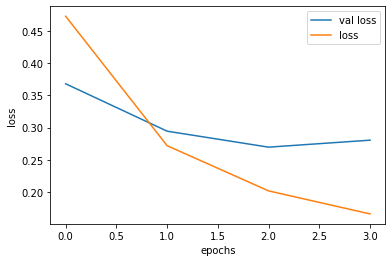

In [20]:
plt.plot(h['val_loss'],label = 'val loss')
plt.plot(h['loss'],label = 'loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

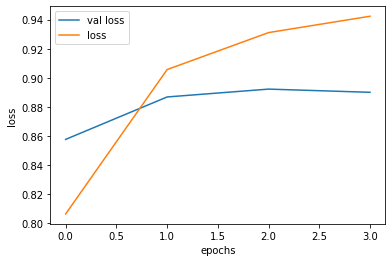

In [21]:
plt.plot(h['val_acc'],label = 'val loss')
plt.plot(h['acc'],label = 'loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Accuracy of training data

In [27]:
model.evaluate(X_train,Y_train)[1]

25000/25000 [==============================] - 5s 201us/step


0.94608

# Accuracy of Testing data

In [32]:
model.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 6s 239us/step


0.87908

In [33]:
model.predict(X_test)

array([[0.19147459],
       [0.9990877 ],
       [0.44349226],
       ...,
       [0.13734636],
       [0.05214414],
       [0.42003202]], dtype=float32)